In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn import preprocessing,metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('E:/Edu_material/4th_sem/MS.c_thesis/referance/ratio_data.csv')

In [3]:
df.head()

Unnamed: 0   fyear                 conml     sic     STDTA      LDTA  \
0           0  1996.0  ASM International NV  3559.0  0.144843  0.143755   
1           1  1997.0  ASM International NV  3559.0  0.367650  0.141853   
2           2  1998.0  ASM International NV  3559.0  0.231285  0.303630   
3           3  1999.0  ASM International NV  3559.0  0.263263  0.018815   
4           4  2000.0  ASM International NV  3559.0  0.057357  0.040697   

       TDTA      NILT     STDEQ      LDEQ        DEQ       ROE      NIRV  \
0  0.288598  0.184115  0.497773  0.494033   0.991807  0.347505  0.094012   
1  0.509503 -0.284313  7.541244  2.909694  10.450938 -4.619228 -0.230103   
2  0.534914  0.001188  3.663068  4.808865   8.471933  0.014275  0.000885   
3  0.282078  0.034885  1.706981  0.121995   1.828975  0.153985  0.024353   
4  0.098054  0.198623  0.144719  0.102685   0.247404  0.231712  0.076391   

       RVAT       ROA   nxt_ROA  
0  1.075587  0.101118 -0.225196  
1  0.978675 -0.225196  0.000901  
2  1.018241  0.000901  0.023749  
3  0.975202  0.023749  0.091835  
4  1.202165  0.091835  0.003088

In [4]:
df.drop('Unnamed: 0',axis = 1, inplace = True)

## Desriptive Analysis

In [5]:
df.columns

Index(['fyear', 'conml', 'sic', 'STDTA', 'LDTA', 'TDTA', 'NILT', 'STDEQ',
       'LDEQ', 'DEQ', 'ROE', 'NIRV', 'RVAT', 'ROA', 'nxt_ROA'],
      dtype='object')

In [6]:
colms = ['STDTA', 'LDTA', 'TDTA', 'NILT', 'STDEQ','LDEQ', 'DEQ', 'ROE', 'NIRV', 'RVAT', 'ROA', 'nxt_ROA']

df[colms].describe()

STDTA           LDTA           TDTA           NILT  \
count  561595.000000  561634.000000  554569.000000  572847.000000   
mean        0.670780       0.689858       1.307579       1.356494   
std       140.968003      98.791219     178.586546    1023.852319   
min      -130.380824      -8.759142    -130.380824 -378823.000000   
25%         0.008318       0.000917       0.050035      -0.013159   
50%         0.066788       0.061566       0.199521       0.032939   
75%         0.172556       0.187167       0.367318       0.133190   
max     73879.457210   48541.500000   73880.149510  408038.775374   

               STDEQ           LDEQ            DEQ            ROE  \
count  559937.000000  559761.000000  552988.000000  573223.000000   
mean        2.652542       0.505438       2.998478      -1.488143   
std       760.309116     510.092709     924.665374     518.322612   
min    -11508.000000 -281472.458333 -281473.458333 -355081.333333   
25%         0.009444       0.000095       0.063347      -0.009946   
50%         0.136363       0.129924       0.399170       0.048733   
75%         0.458481       0.511140       1.040392       0.131567   
max    455466.228478   63034.541490  455470.496505   19074.072856   

                NIRV           RVAT            ROA        nxt_ROA  
count  565027.000000  575555.000000  575140.000000  531744.000000  
mean       -6.108188       1.163146      -0.136349      -0.101889  
std      1252.852192     142.337492      99.337930     101.661885  
min   -649629.333333    -631.136364  -43595.285714  -43595.285714  
25%        -0.004455       0.245545      -0.006687      -0.007019  
50%         0.028707       0.678868       0.016936       0.016504  
75%         0.099442       1.145147       0.054835       0.053848  
max    109412.000000  100887.833333   29587.000000   29587.000000

In [7]:
## Taking Data from 2001 to 2016
dff = df[(df['fyear']> 2000)]

## Analysis of ROA Year wise

In [8]:
dff.groupby(['fyear'])['ROA'].mean()

fyear
2001.0   -0.168497
2002.0   -0.207921
2003.0   -0.522150
2004.0   -0.290540
2005.0   -0.088825
2006.0   -0.800683
2007.0   -0.471470
2008.0    0.338077
2009.0   -0.093562
2010.0   -0.025435
2011.0    1.067214
2012.0   -1.609783
2013.0    0.651274
2014.0   -0.328590
2015.0   -0.303891
2016.0   -0.142779
Name: ROA, dtype: float64

In [9]:
x = dff.groupby(['fyear'])['ROA'].mean().index
y = dff.groupby(['fyear'])['ROA'].mean().values

Text(0, 0.5, 'ROA')

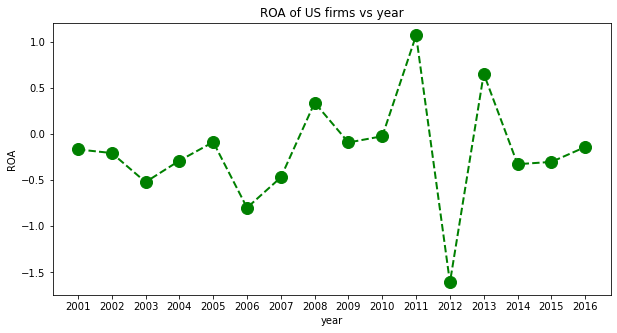

In [10]:

plt.figure(figsize=(10,5))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.plot(x,y,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.title('ROA of US firms vs year')
plt.xlabel('year')
plt.ylabel('ROA')

## Remove outlier

#### Having only industires which ROA belong b/w -1 to 1

In [11]:
#indx = dff.groupby(['sic'])['ROA'].mean()[(dff.groupby(['sic'])['ROA'].mean() > -1) & (dff.groupby(['sic'])['ROA'].mean() < 1)].index

In [12]:
# df1 = dff[dff['sic'].isin(indx) == True]
df1 = dff[(dff['ROA'] < 1) & ((dff['ROA'] > -1))]

Text(0, 0.5, 'ROA')

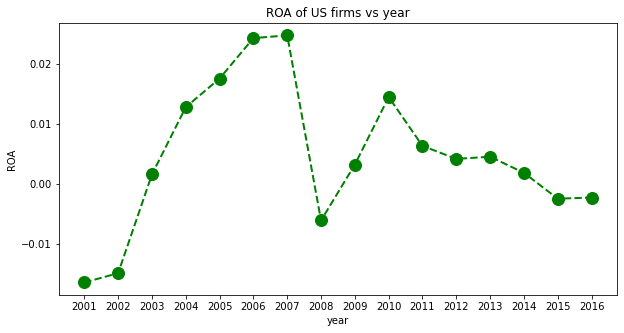

In [13]:
x = df1.groupby(['fyear'])['ROA'].mean().index
y = df1.groupby(['fyear'])['ROA'].mean().values
plt.figure(figsize=(10,5))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.plot(x,y,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.title('ROA of US firms vs year')
plt.xlabel('year')
plt.ylabel('ROA')

In [14]:
df_bf_2009 = df1[df1['fyear'] < 2009]
df_af_2009 = df1[df1['fyear'] >= 2009]

In [15]:
## Financial descriptive Statistics before 2009
df_bf_2009.describe()

fyear            sic          STDTA           LDTA  \
count  209874.000000  209632.000000  204541.000000  205213.000000   
mean     2004.803544    4491.339543       0.642639       0.414301   
std         2.255196    2059.277137     166.151227      58.655373   
min      2001.000000     100.000000      -0.189547      -0.026255   
25%      2003.000000    2851.000000       0.007313       0.000871   
50%      2005.000000    3829.000000       0.065957       0.060151   
75%      2007.000000    6211.000000       0.171586       0.188647   
max      2008.000000    9998.000000   73879.457210   22716.532609   

                TDTA           NILT          STDEQ           LDEQ  \
count  202336.000000  209131.000000  203830.000000  204346.000000   
mean        1.019521       2.716798       3.577739       1.477594   
std       183.080181    1535.135467    1012.474759     196.558014   
min        -0.189547 -378823.000000  -11508.000000  -17376.800000   
25%         0.047400      -0.013683       0.009033       0.000221   
50%         0.200034       0.035787       0.138609       0.129816   
75%         0.366635       0.142582       0.466167       0.518013   
max     73880.149510  408038.775374  455466.228478   63034.541490   

                 DEQ            ROE           NIRV           RVAT  \
count  201657.000000  208915.000000  205276.000000  209697.000000   
mean        5.026008       0.096213      -3.223036       0.889203   
std      1039.327292      27.261643     824.461854       2.421338   
min    -17376.800000   -1768.500000 -357492.000000      -1.581409   
25%         0.064559      -0.011975      -0.005103       0.263039   
50%         0.407902       0.051347       0.030370       0.702732   
75%         1.051677       0.143574       0.102556       1.170202   
max    455470.496505   10035.000000   56118.000000     363.136904   

                 ROA        nxt_ROA  
count  209874.000000  204141.000000  
mean        0.006914      -0.027273  
std         0.149871      87.828650  
min        -0.999653  -11748.183268  
25%        -0.006836      -0.006401  
50%         0.018236       0.018584  
75%         0.059540       0.060168  
max         0.998668   26078.250000

In [16]:
## Financial descriptive Statistics from 2009
df_af_2009.describe()

fyear            sic          STDTA           LDTA  \
count  235465.000000  235208.000000  227236.000000  225968.000000   
mean     2012.143006    4447.740562       0.563313       0.228099   
std         2.066098    2059.406314     142.140420      16.773125   
min      2009.000000     100.000000      -1.115265      -3.826546   
25%      2010.000000    2836.000000       0.007216       0.000000   
50%      2012.000000    3730.000000       0.062956       0.051416   
75%      2014.000000    6211.000000       0.166472       0.176754   
max      2016.000000    9998.000000   63045.928964    5999.314383   

                TDTA           NILT          STDEQ           LDEQ  \
count  223000.000000  234406.000000  226847.000000  225551.000000   
mean        0.686186       1.434268       2.405055       1.422569   
std       135.494800     657.207608     686.160446     205.987501   
min        -4.941811  -10765.588462   -4178.850000  -36638.500000   
25%         0.040538      -0.013768       0.007810       0.000000   
50%         0.185470       0.037571       0.122740       0.100846   
75%         0.355894       0.150796       0.420901       0.451897   
max     63046.687074  317884.000000  322487.421347   53858.142857   

                 DEQ            ROE           NIRV           RVAT  \
count  222636.000000  234946.000000  228625.000000  234987.000000   
mean        3.490885      -0.036351      -2.869212       0.804687   
std       715.954950      16.584048     259.620984       1.934535   
min    -37020.500000   -4310.778197  -74515.000000      -4.793918   
25%         0.046344      -0.008130      -0.002566       0.213829   
50%         0.352913       0.049892       0.034136       0.624051   
75%         0.951346       0.125282       0.110577       1.081907   
max    322491.299171    1941.793691   24819.000000     213.936251   

                 ROA        nxt_ROA  
count  235465.000000  197979.000000  
mean        0.004405      -0.267964  
std         0.144729     102.742119  
min        -0.999444  -43595.285714  
25%        -0.006622      -0.006086  
50%         0.018698       0.018651  
75%         0.057372       0.056200  
max         0.997795   10900.000000

In [17]:
df1.isna().sum()

fyear          0
conml          0
sic          499
STDTA      13562
LDTA       14158
TDTA       20003
NILT        1802
STDEQ      14662
LDEQ       15442
DEQ        21046
ROE         1478
NIRV       11438
RVAT         655
ROA            0
nxt_ROA    43219
dtype: int64

### Industry wise ROA trend
- selcted industries - 6500, 6020, 5094, 100, 6162

### Real Estate , Sic = 6500

Text(0, 0.5, 'ROA')

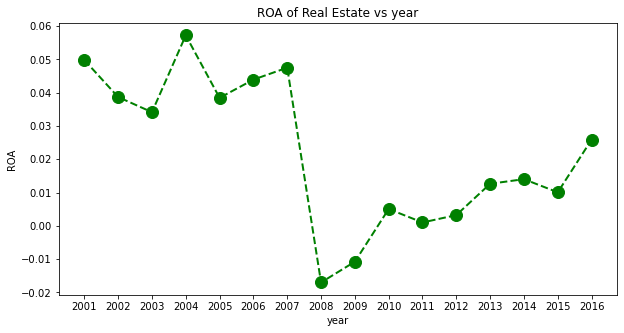

In [18]:
x = df1[df1['sic']==6500].groupby(['fyear'])['ROA'].mean().index
y = df1[df1['sic']==6500].groupby(['fyear'])['ROA'].mean().values
plt.figure(figsize=(10,5))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.plot(x,y,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.title('ROA of Real Estate vs year')
plt.xlabel('year')
plt.ylabel('ROA')

### commercial Bank , Sic = 6020

Text(0, 0.5, 'ROA')

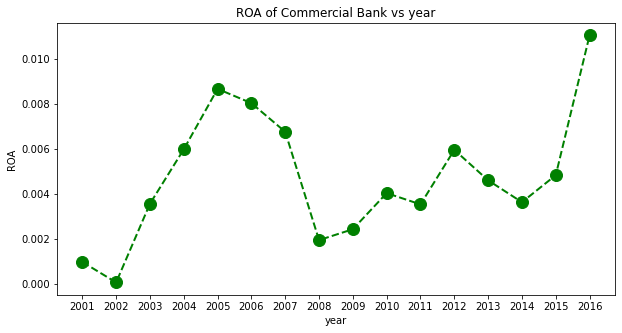

In [19]:
x = df1[df1['sic']== 6020].groupby(['fyear'])['ROA'].mean().index
y = df1[df1['sic']==6020].groupby(['fyear'])['ROA'].mean().values
plt.figure(figsize=(10,5))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.plot(x,y,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.title('ROA of Commercial Bank vs year')
plt.xlabel('year')
plt.ylabel('ROA')

##  JEWELRY & WATCHES industries , sic = 5094

Text(0, 0.5, 'ROA')

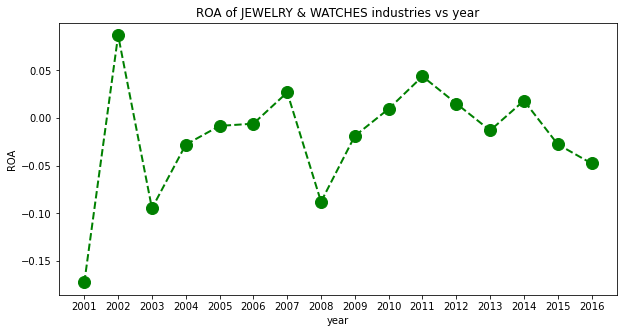

In [20]:
x = df1[df1['sic']== 5094].groupby(['fyear'])['ROA'].mean().index
y = df1[df1['sic']== 5094].groupby(['fyear'])['ROA'].mean().values
plt.figure(figsize=(10,5))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.plot(x,y,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.title('ROA of JEWELRY & WATCHES industries vs year')
plt.xlabel('year')
plt.ylabel('ROA')

### Agricultural production Crops industries , sic = 100

Text(0, 0.5, 'ROA')

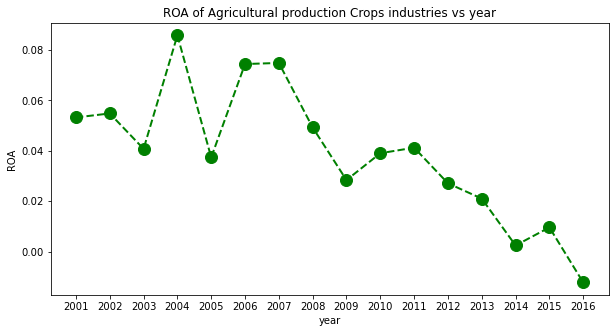

In [21]:
x = df1[df1['sic']== 100].groupby(['fyear'])['ROA'].mean().index
y = df1[df1['sic']== 100].groupby(['fyear'])['ROA'].mean().values
plt.figure(figsize=(10,5))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.plot(x,y,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.title('ROA of Agricultural production Crops industries vs year')
plt.xlabel('year')
plt.ylabel('ROA')

## Morgage Bankers and loan corr , Sic= 6162

Text(0, 0.5, 'ROA')

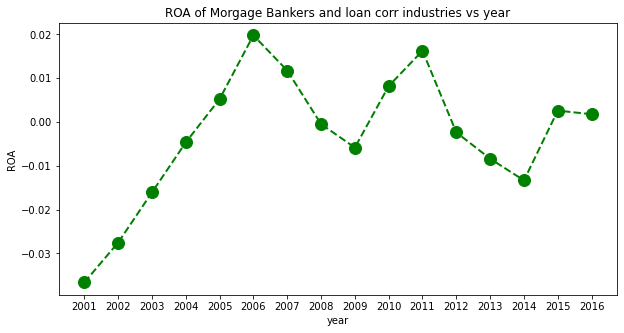

In [22]:
x = df1[df1['sic']== 6162].groupby(['fyear'])['ROA'].mean().index
y = df1[df1['sic']== 6162].groupby(['fyear'])['ROA'].mean().values
plt.figure(figsize=(10,5))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.plot(x,y,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.title('ROA of Morgage Bankers and loan corr industries vs year')
plt.xlabel('year')
plt.ylabel('ROA')

## Question 1 : Is there any difference between firm's performance before and After financial Crisis 2008

In [23]:
df_af_2009[colms].describe()

STDTA           LDTA           TDTA           NILT  \
count  227236.000000  225968.000000  223000.000000  234406.000000   
mean        0.563313       0.228099       0.686186       1.434268   
std       142.140420      16.773125     135.494800     657.207608   
min        -1.115265      -3.826546      -4.941811  -10765.588462   
25%         0.007216       0.000000       0.040538      -0.013768   
50%         0.062956       0.051416       0.185470       0.037571   
75%         0.166472       0.176754       0.355894       0.150796   
max     63045.928964    5999.314383   63046.687074  317884.000000   

               STDEQ           LDEQ            DEQ            ROE  \
count  226847.000000  225551.000000  222636.000000  234946.000000   
mean        2.405055       1.422569       3.490885      -0.036351   
std       686.160446     205.987501     715.954950      16.584048   
min     -4178.850000  -36638.500000  -37020.500000   -4310.778197   
25%         0.007810       0.000000       0.046344      -0.008130   
50%         0.122740       0.100846       0.352913       0.049892   
75%         0.420901       0.451897       0.951346       0.125282   
max    322487.421347   53858.142857  322491.299171    1941.793691   

                NIRV           RVAT            ROA        nxt_ROA  
count  228625.000000  234987.000000  235465.000000  197979.000000  
mean       -2.869212       0.804687       0.004405      -0.267964  
std       259.620984       1.934535       0.144729     102.742119  
min    -74515.000000      -4.793918      -0.999444  -43595.285714  
25%        -0.002566       0.213829      -0.006622      -0.006086  
50%         0.034136       0.624051       0.018698       0.018651  
75%         0.110577       1.081907       0.057372       0.056200  
max     24819.000000     213.936251       0.997795   10900.000000

In [24]:
df_bf_2009[colms].describe()

STDTA           LDTA           TDTA           NILT  \
count  204541.000000  205213.000000  202336.000000  209131.000000   
mean        0.642639       0.414301       1.019521       2.716798   
std       166.151227      58.655373     183.080181    1535.135467   
min        -0.189547      -0.026255      -0.189547 -378823.000000   
25%         0.007313       0.000871       0.047400      -0.013683   
50%         0.065957       0.060151       0.200034       0.035787   
75%         0.171586       0.188647       0.366635       0.142582   
max     73879.457210   22716.532609   73880.149510  408038.775374   

               STDEQ           LDEQ            DEQ            ROE  \
count  203830.000000  204346.000000  201657.000000  208915.000000   
mean        3.577739       1.477594       5.026008       0.096213   
std      1012.474759     196.558014    1039.327292      27.261643   
min    -11508.000000  -17376.800000  -17376.800000   -1768.500000   
25%         0.009033       0.000221       0.064559      -0.011975   
50%         0.138609       0.129816       0.407902       0.051347   
75%         0.466167       0.518013       1.051677       0.143574   
max    455466.228478   63034.541490  455470.496505   10035.000000   

                NIRV           RVAT            ROA        nxt_ROA  
count  205276.000000  209697.000000  209874.000000  204141.000000  
mean       -3.223036       0.889203       0.006914      -0.027273  
std       824.461854       2.421338       0.149871      87.828650  
min   -357492.000000      -1.581409      -0.999653  -11748.183268  
25%        -0.005103       0.263039      -0.006836      -0.006401  
50%         0.030370       0.702732       0.018236       0.018584  
75%         0.102556       1.170202       0.059540       0.060168  
max     56118.000000     363.136904       0.998668   26078.250000

### Z- Statistics 

- Null Hypothesis : There is no difference between firm's performance before and After financial Crisis 2008

- 5% level of significant, two tail test 
- Zalph = 1.960

In [25]:
Roa_mean_bf_2009 = df_bf_2009['ROA'].mean()
Roa_mean_af_2009 = df_af_2009['ROA'].mean()

Roa_std_bf_2009 = (df_bf_2009['ROA'].std()**2)/len(df_bf_2009['ROA'])

Roa_std_af_2009 = (df_af_2009['ROA'].std()**2)/len(df_af_2009['ROA'])

In [26]:
z = (Roa_mean_bf_2009 - Roa_mean_af_2009)/ np.sqrt(Roa_std_bf_2009 + Roa_std_af_2009)
z 

5.665554728362782

In [27]:
## Since Z-score is greater than critical value  , Hance reject H0

## USE industries level Analysis :SiC 6500, 6020, 6162

In [28]:
l1 = [6500,6162, 6020]
l2 = ['Real Estate','Morgage Bankers and loan corr','commercial Bank']

In [29]:
for i,j in zip(l1,l2) :
    
    Roa_mean_bf_2009 = df_bf_2009[df['sic']== i ]['ROA'].mean()
    Roa_mean_af_2009 = df_af_2009[df['sic']== i ]['ROA'].mean()

    Roa_std_bf_2009 = (df_bf_2009[df['sic']== i ]['ROA'].std()**2)/len(df_bf_2009[df['sic']== i]['ROA'])

    Roa_std_af_2009 = (df_af_2009[df['sic']== i ]['ROA'].std()**2)/len(df_af_2009[df['sic']== i]['ROA'])

    z = (Roa_mean_bf_2009 - Roa_mean_af_2009)/ np.sqrt(Roa_std_bf_2009 + Roa_std_af_2009)
    z
    
    if (z> 0) & (z > 1.960) :
        print(z,"Hance there is a significant difference b/w firm's performance before and After financial Crisis 2008 in ",j)
    elif (z < 0) & (z < -1.960) :
         print(z,"Hance there is a significant difference b/w firm's performance before and After financial Crisis 2008 in ",j)
    else :
        print(z,"Hance there is no significant difference b/w firm's performance before and After financial Crisis 2008 in ",j)

7.913949121973228 Hance there is a significant difference b/w firm's performance before and After financial Crisis 2008 in  Real Estate
-0.5001482419078167 Hance there is no significant difference b/w firm's performance before and After financial Crisis 2008 in  Morgage Bankers and loan corr
0.462950625950588 Hance there is no significant difference b/w firm's performance before and After financial Crisis 2008 in  commercial Bank


## Debt to Eqity  Ratio (leverage Analysis)

In [30]:
df1.groupby(['fyear'])['DEQ'].mean()

fyear
2001.0     3.425506
2002.0     2.971160
2003.0     3.409388
2004.0     1.648929
2005.0     1.941145
2006.0     1.739263
2007.0     3.135068
2008.0    19.514373
2009.0    14.442975
2010.0     3.254073
2011.0     1.552162
2012.0     2.594900
2013.0     0.170810
2014.0     1.243030
2015.0     2.291561
2016.0     0.799328
Name: DEQ, dtype: float64

### Analysis of overall leverage cross the all industries

Text(0, 0.5, 'ROA')

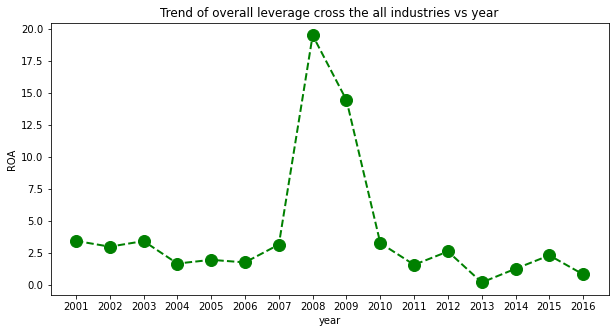

In [31]:
x = df1.groupby(['fyear'])['DEQ'].mean().index
y = df1.groupby(['fyear'])['DEQ'].mean().values
plt.figure(figsize=(10,5))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.plot(x,y,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.title('Trend of overall leverage cross the all industries vs year')
plt.xlabel('year')
plt.ylabel('ROA')

In [32]:
df1[['STDEQ','LDEQ','DEQ']].corr()

STDEQ      LDEQ       DEQ
STDEQ  1.000000  0.009572  0.973463
LDEQ   0.009572  1.000000  0.238151
DEQ    0.973463  0.238151  1.000000

In [33]:
df_bf_2009[(df1['DEQ']<= 10) & (df1['DEQ'] >= 0)].groupby('sic')['DEQ'].mean()[6500]

1.4095107005156167

In [34]:
df_bf_2009[(df_bf_2009['DEQ']<= 10) & (df_bf_2009['DEQ'] >= 0)].groupby('sic')['DEQ'].mean().sort_values(ascending = False).head(20)

sic
6029.0    5.927428
6532.0    4.415132
6172.0    3.516111
7377.0    2.970192
6162.0    2.951096
6141.0    2.693758
6036.0    2.630526
7510.0    2.494948
6199.0    2.300470
6159.0    2.227097
6020.0    2.109026
8051.0    1.975731
4011.0    1.867154
6513.0    1.826488
5735.0    1.785660
7997.0    1.730994
6163.0    1.672496
6153.0    1.672387
4512.0    1.656265
6035.0    1.618185
Name: DEQ, dtype: float64

In [35]:
df_af_2009[(df_af_2009['DEQ']<= 10) & (df_af_2009['DEQ'] >= 0)].groupby('sic')['DEQ'].mean().sort_values(ascending = False)

sic
6399.0    6.444039
7377.0    3.847103
6162.0    3.300409
6172.0    3.235868
6036.0    2.998212
            ...   
6321.0    0.035817
6794.0    0.028576
8600.0    0.003553
2780.0    0.002237
6795.0    0.000000
Name: DEQ, Length: 450, dtype: float64

## Some most leverage Industries :
- 6029 - COMMERCIAL BANKS, NEC , wht is NEC - it is Austrilian firm so should be remove  : DEQ = 5.9
- 6532 - REAL ESTATE DEALERS , DEQ = 4.41
- 6172 -  FINANCE LESSORS , DEQ = 3.51
- 6162 - MORTGAGE BANKERS & LOAN CORR , DEQ = 2.95
- 6199 - FINANCE SERVICES , DEQ = 2.3
- 6020 - Commercial Bank , DEQ = 2.1
- 4512 - AIR TRANSPORT, SCHEDULED , DEQ = 1.89

## Analysis of those industries which had more leverage before 2009: ( during and before financial crisis 2008) 
    ###  Also did Hypothesis Testing is there any significant difference between firm's performance before and after Financial crisis(2008)
    ## Null Hypothesis (H0) : there is no difference at 5% level of significant

###  6532 - REAL ESTATE DEALERS , DEQ = 4.41

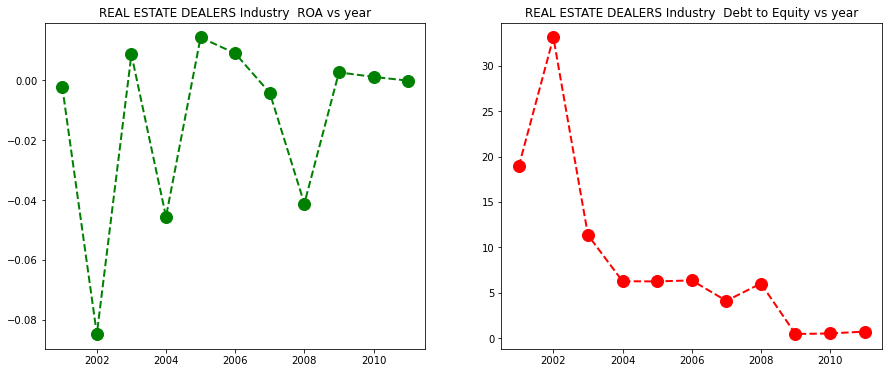

In [36]:
f = plt.figure(figsize=(15,6))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

x = df1[df1['sic']== 6532].groupby(['fyear'])['ROA'].mean().index
y = df1[df1['sic']== 6532].groupby(['fyear'])['ROA'].mean().values
z = df1[df1['sic']== 6532].groupby(['fyear'])['DEQ'].mean().values


ax1.plot(x, y,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax2.plot(x, z,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax1.title.set_text('REAL ESTATE DEALERS Industry  ROA vs year')
ax2.title.set_text('REAL ESTATE DEALERS Industry  Debt to Equity vs year')

In [37]:
df1[df1['sic']== 6532].groupby(['fyear'])['DEQ'].mean()

fyear
2001.0    18.921619
2002.0    33.102725
2003.0    11.347541
2004.0     6.272017
2005.0     6.248383
2006.0     6.365603
2007.0     4.116373
2008.0     6.017671
2009.0     0.464758
2010.0     0.518528
2011.0     0.729688
Name: DEQ, dtype: float64

        ## Hypothesis Testing

In [38]:
Roa_mean_bf_2009 = df_bf_2009[df['sic']== 6532 ]['ROA'].mean()
Roa_mean_af_2009 = df_af_2009[df['sic']== 6532 ]['ROA'].mean()

Roa_std_bf_2009 = (df_bf_2009[df['sic']== 6532]['ROA'].std()**2)/len(df_bf_2009[df['sic']==6532]['ROA'])

Roa_std_af_2009 = (df_af_2009[df['sic']== 6532]['ROA'].std()**2)/len(df_af_2009[df['sic']==6532]['ROA'])

z = (Roa_mean_bf_2009 - Roa_mean_af_2009)/ np.sqrt(Roa_std_bf_2009 + Roa_std_af_2009)
print(z)

if (z> 0) & (z > 1.960) :
    print("Hance there is a significant difference b/w firm's performance before and After financial Crisis 2008 in REAL ESTATE DEALERS")
elif (z < 0) & (z < -1.960) :
     print("Hance there is a significant difference b/w firm's performance before and After financial Crisis 2008 in REAL ESTATE DEALERS")
else :
    print("Hance there is no significant difference b/w firm's performance before and After financial Crisis 2008 in REAL ESTATE DEALERS")

-1.2590223207178584
Hance there is no significant difference b/w firm's performance before and After financial Crisis 2008 in REAL ESTATE DEALERS


### 6172 - FINANCE LESSORS , DEQ = 3.51

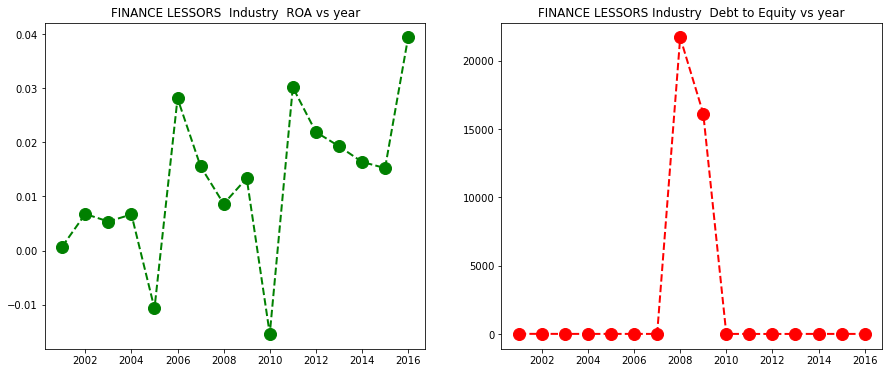

In [39]:
f = plt.figure(figsize=(15,6))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

x = df1[df1['sic']== 6172].groupby(['fyear'])['ROA'].mean().index
y = df1[df1['sic']== 6172].groupby(['fyear'])['ROA'].mean().values
z = df1[df1['sic']== 6172].groupby(['fyear'])['DEQ'].mean().values


ax1.plot(x, y,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax2.plot(x, z,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax1.title.set_text('FINANCE LESSORS  Industry  ROA vs year')
ax2.title.set_text('FINANCE LESSORS Industry  Debt to Equity vs year')

In [40]:
df1[df1['sic']== 6172].groupby(['fyear'])['DEQ'].mean()

fyear
2001.0        7.929971
2002.0        7.143445
2003.0        5.134958
2004.0        4.228110
2005.0        4.922554
2006.0        4.392539
2007.0        4.236625
2008.0    21693.653647
2009.0    16127.536992
2010.0        3.505917
2011.0        3.033001
2012.0       -1.086913
2013.0        3.285324
2014.0        3.527958
2015.0        3.653273
2016.0        3.619540
Name: DEQ, dtype: float64

        Hypothesis TEsting

In [41]:
Roa_mean_bf_2009 = df_bf_2009[df['sic']== 6172 ]['ROA'].mean()
Roa_mean_af_2009 = df_af_2009[df['sic']== 6172 ]['ROA'].mean()

Roa_std_bf_2009 = (df_bf_2009[df['sic']== 6172]['ROA'].std()**2)/len(df_bf_2009[df['sic']==6172]['ROA'])

Roa_std_af_2009 = (df_af_2009[df['sic']== 6172]['ROA'].std()**2)/len(df_af_2009[df['sic']==6172]['ROA'])

z = (Roa_mean_bf_2009 - Roa_mean_af_2009)/ np.sqrt(Roa_std_bf_2009 + Roa_std_af_2009)
print(z)

if (z> 0) & (z > 1.960) :
    print("Hance there is a significant difference b/w firm's performance before and After financial Crisis 2008 in FINANCE LESSORS")
elif (z < 0) & (z < -1.960) :
     print("Hance there is a significant difference b/w firm's performance before and After financial Crisis 2008 in FINANCE LESSORS")
else :
    print("Hance there is no significant difference b/w firm's performance before and After financial Crisis 2008 in FINANCE LESSORS")

-1.1865088262303496
Hance there is no significant difference b/w firm's performance before and After financial Crisis 2008 in FINANCE LESSORS


### 6162 - MORTGAGE BANKERS & LOAN CORR , DEQ = 2.95

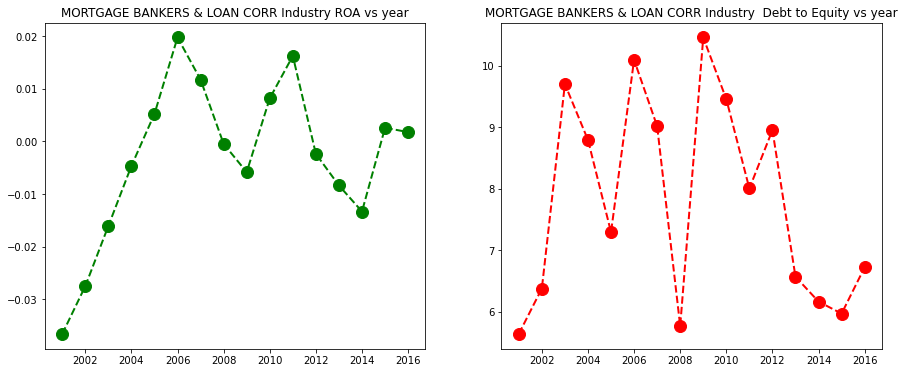

In [42]:
f = plt.figure(figsize=(15,6))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

x = df1[df1['sic']== 6162].groupby(['fyear'])['ROA'].mean().index
y = df1[df1['sic']== 6162].groupby(['fyear'])['ROA'].mean().values
z = df1[df1['sic']== 6162].groupby(['fyear'])['DEQ'].mean().values


ax1.plot(x, y,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax2.plot(x, z,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax1.title.set_text('MORTGAGE BANKERS & LOAN CORR Industry ROA vs year')
ax2.title.set_text('MORTGAGE BANKERS & LOAN CORR Industry  Debt to Equity vs year')

In [43]:
df1[df1['sic']== 6162 ].groupby(['fyear'])['DEQ'].mean()

fyear
2001.0     5.634559
2002.0     6.374325
2003.0     9.701331
2004.0     8.792265
2005.0     7.292375
2006.0    10.095405
2007.0     9.016830
2008.0     5.763169
2009.0    10.460043
2010.0     9.455627
2011.0     8.002225
2012.0     8.952152
2013.0     6.566543
2014.0     6.161259
2015.0     5.966106
2016.0     6.720458
Name: DEQ, dtype: float64

In [44]:
Roa_mean_bf_2009 = df_bf_2009[df['sic']== 6162 ]['ROA'].mean()
Roa_mean_af_2009 = df_af_2009[df['sic']== 6162 ]['ROA'].mean()

Roa_std_bf_2009 = (df_bf_2009[df['sic']== 6162]['ROA'].std()**2)/len(df_bf_2009[df['sic']==6162]['ROA'])

Roa_std_af_2009 = (df_af_2009[df['sic']== 6162]['ROA'].std()**2)/len(df_af_2009[df['sic']==6162]['ROA'])

z = (Roa_mean_bf_2009 - Roa_mean_af_2009)/ np.sqrt(Roa_std_bf_2009 + Roa_std_af_2009)

print(z)

if (z> 0) & (z > 1.960) :
    print("Hance there is a significant difference b/w firm's performance before and After financial Crisis 2008 in MORTGAGE BANKERS & LOAN CORR")
elif (z < 0) & (z < -1.960) :
     print("Hance there is a significant difference b/w firm's performance before and After financial Crisis 2008 in MORTGAGE BANKERS & LOAN CORR")
else :
    print("Hance there is no significant difference b/w firm's performance before and After financial Crisis 2008 in MORTGAGE BANKERS & LOAN CORR")

-0.5001482419078167
Hance there is no significant difference b/w firm's performance before and After financial Crisis 2008 in MORTGAGE BANKERS & LOAN CORR


### 6199 - FINANCE SERVICES , DEQ = 2.3

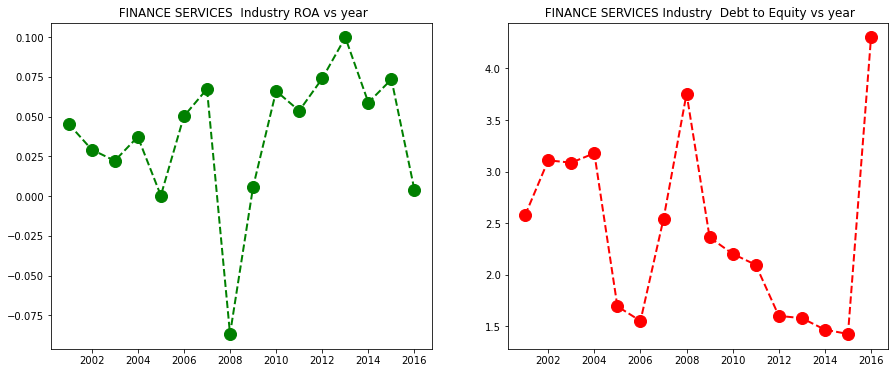

In [45]:
f = plt.figure(figsize=(15,6))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

x = df1[df1['sic']== 6199 ].groupby(['fyear'])['ROA'].mean().index
y = df1[df1['sic']== 6199 ].groupby(['fyear'])['ROA'].mean().values
z = df1[df1['sic']== 6199 ].groupby(['fyear'])['DEQ'].mean().values


ax1.plot(x, y,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax2.plot(x, z,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax1.title.set_text(' FINANCE SERVICES  Industry ROA vs year')
ax2.title.set_text(' FINANCE SERVICES Industry  Debt to Equity vs year')

In [46]:
df1[df1['sic']== 6199 ].groupby(['fyear'])['DEQ'].mean()

fyear
2001.0    2.577867
2002.0    3.108840
2003.0    3.086134
2004.0    3.177700
2005.0    1.693269
2006.0    1.551364
2007.0    2.540775
2008.0    3.755376
2009.0    2.361622
2010.0    2.202088
2011.0    2.095865
2012.0    1.600815
2013.0    1.578389
2014.0    1.467166
2015.0    1.425208
2016.0    4.300139
Name: DEQ, dtype: float64

In [47]:
Roa_mean_bf_2009 = df_bf_2009[df['sic']== 6199 ]['ROA'].mean()
Roa_mean_af_2009 = df_af_2009[df['sic']== 6199 ]['ROA'].mean()

Roa_std_bf_2009 = (df_bf_2009[df['sic']== 6199]['ROA'].std()**2)/len(df_bf_2009[df['sic']==6199]['ROA'])

Roa_std_af_2009 = (df_af_2009[df['sic']== 6199]['ROA'].std()**2)/len(df_af_2009[df['sic']==6199]['ROA'])

z = (Roa_mean_bf_2009 - Roa_mean_af_2009)/ np.sqrt(Roa_std_bf_2009 + Roa_std_af_2009)
print(z)

if (z> 0) & (z > 1.960) :
    print("Hance there is a significant difference b/w firm's performance before and After financial Crisis 2008 in  FINANCE SERVICES")
elif (z < 0) & (z < -1.960) :
     print("Hance there is a significant difference b/w firm's performance before and After financial Crisis 2008 in  FINANCE SERVICES")
else :
    print("Hance there is no significant difference b/w firm's performance before and After financial Crisis 2008 in  FINANCE SERVICES")

-1.228378746091889
Hance there is no significant difference b/w firm's performance before and After financial Crisis 2008 in  FINANCE SERVICES


### 6020 - Commercial Bank , DEQ = 2.1

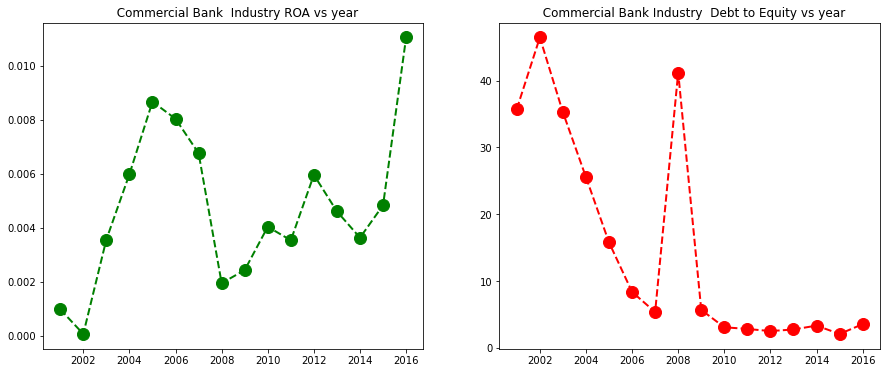

In [48]:
f = plt.figure(figsize=(15,6))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

x = df1[df1['sic']== 6020 ].groupby(['fyear'])['ROA'].mean().index
y = df1[df1['sic']== 6020 ].groupby(['fyear'])['ROA'].mean().values
z = df1[df1['sic']== 6020 ].groupby(['fyear'])['DEQ'].mean().values


ax1.plot(x, y,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax2.plot(x, z,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax1.title.set_text('  Commercial Bank  Industry ROA vs year')
ax2.title.set_text('  Commercial Bank Industry  Debt to Equity vs year')

In [49]:
df1[df1['sic']== 6020 ].groupby(['fyear'])['DEQ'].mean()

fyear
2001.0    35.760829
2002.0    46.468899
2003.0    35.263149
2004.0    25.545573
2005.0    15.769982
2006.0     8.357791
2007.0     5.342870
2008.0    41.218027
2009.0     5.663377
2010.0     3.066777
2011.0     2.810342
2012.0     2.494999
2013.0     2.732700
2014.0     3.313916
2015.0     2.059676
2016.0     3.529820
Name: DEQ, dtype: float64

In [50]:
Roa_mean_bf_2009 = df_bf_2009[df['sic']== 6020 ]['ROA'].mean()
Roa_mean_af_2009 = df_af_2009[df['sic']== 6020 ]['ROA'].mean()

Roa_std_bf_2009 = (df_bf_2009[df['sic']== 6020]['ROA'].std()**2)/len(df_bf_2009[df['sic']==6020]['ROA'])

Roa_std_af_2009 = (df_af_2009[df['sic']== 6020]['ROA'].std()**2)/len(df_af_2009[df['sic']==6020]['ROA'])

z = (Roa_mean_bf_2009 - Roa_mean_af_2009)/ np.sqrt(Roa_std_bf_2009 + Roa_std_af_2009)

print(z)
if (z> 0) & (z > 1.960) :
    print("Hance there is a significant difference b/w firm's performance before and After financial Crisis 2008 in Commercial Bank")
elif (z < 0) & (z < -1.960) :
     print("Hance there is a significant difference b/w firm's performance before and After financial Crisis 2008 in Commercial Bank")
else :
    print("Hance there is no significant difference b/w firm's performance before and After financial Crisis 2008 in Commercial Bank")

0.462950625950588
Hance there is no significant difference b/w firm's performance before and After financial Crisis 2008 in Commercial Bank


### 4512 - AIR TRANSPORT, SCHEDULED , DEQ = 1.89

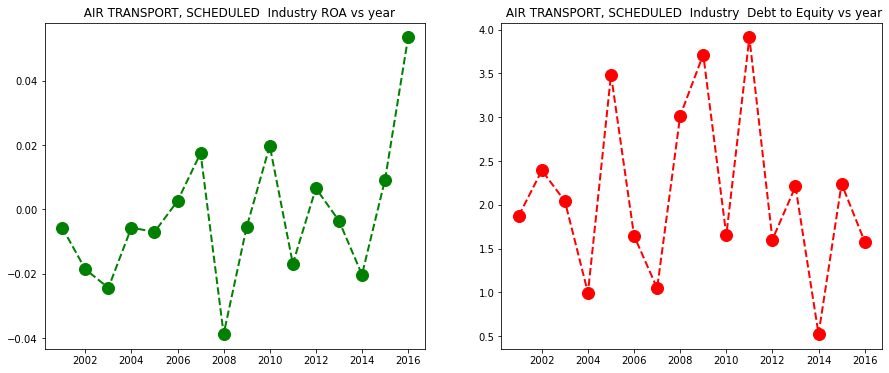

In [51]:
f = plt.figure(figsize=(15,6))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

x = df1[df1['sic']== 4512  ].groupby(['fyear'])['ROA'].mean().index
y = df1[df1['sic']== 4512 ].groupby(['fyear'])['ROA'].mean().values
z = df1[df1['sic']== 4512  ].groupby(['fyear'])['DEQ'].mean().values


ax1.plot(x, y,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax2.plot(x, z,color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax1.title.set_text('  AIR TRANSPORT, SCHEDULED  Industry ROA vs year')
ax2.title.set_text(' AIR TRANSPORT, SCHEDULED  Industry  Debt to Equity vs year')

In [52]:
Roa_mean_bf_2009 = df_bf_2009[df['sic']== 4512 ]['ROA'].mean()
Roa_mean_af_2009 = df_af_2009[df['sic']== 4512 ]['ROA'].mean()

Roa_std_bf_2009 = (df_bf_2009[df['sic']== 4512]['ROA'].std()**2)/len(df_bf_2009[df['sic']== 4512]['ROA'])

Roa_std_af_2009 = (df_af_2009[df['sic']== 4512]['ROA'].std()**2)/len(df_af_2009[df['sic']==4512]['ROA'])

z = (Roa_mean_bf_2009 - Roa_mean_af_2009)/ np.sqrt(Roa_std_bf_2009 + Roa_std_af_2009)
print(z)

if (z> 0) & (z > 1.960) :
    print("Hance there is a significant difference b/w firm's performance before and After financial Crisis 2008 in REAL ESTATE DEALERS")
elif (z < 0) & (z < -1.960) :
     print("Hance there is a significant difference b/w firm's performance before and After financial Crisis 2008 in REAL ESTATE DEALERS")
else :
    print("Hance there is no significant difference b/w firm's performance before and After financial Crisis 2008 in REAL ESTATE DEALERS")

-1.374509097145529
Hance there is no significant difference b/w firm's performance before and After financial Crisis 2008 in REAL ESTATE DEALERS


In [53]:
df1[df1['sic']== 4512 ].groupby(['fyear'])['DEQ'].mean()

fyear
2001.0    1.874785
2002.0    2.392517
2003.0    2.040818
2004.0    0.993969
2005.0    3.485611
2006.0    1.645616
2007.0    1.046052
2008.0    3.016974
2009.0    3.715603
2010.0    1.652658
2011.0    3.911178
2012.0    1.603081
2013.0    2.208869
2014.0    0.523928
2015.0    2.239503
2016.0    1.579543
Name: DEQ, dtype: float64

### Models for forcating Next year permormance

In [54]:
df1[colms].dropna().describe()

STDTA           LDTA           TDTA           NILT  \
count  373838.000000  373838.000000  373838.000000  373838.000000   
mean        0.536671       0.256464       0.793135       0.498222   
std       158.973340      24.368351     161.195876     976.221240   
min        -0.189547      -0.052303      -0.189547 -378823.000000   
25%         0.009233       0.000642       0.049612      -0.006263   
50%         0.067367       0.058867       0.196967       0.040060   
75%         0.171354       0.184402       0.362442       0.147337   
max     73879.457210   11687.217391   73880.149510  408038.775374   

               STDEQ           LDEQ            DEQ            ROE  \
count  373838.000000  373838.000000  373838.000000  373838.000000   
mean        3.012006       1.348246       4.360252       0.037228   
std       914.658560     192.188754     935.908419      23.246454   
min    -11508.000000  -36638.500000  -37020.500000   -4310.778197   
25%         0.012277       0.000068       0.068158      -0.004380   
50%         0.140915       0.122243       0.397540       0.054603   
75%         0.459532       0.492894       1.021613       0.138690   
max    455466.228478   63034.541490  455470.496505   10035.000000   

                NIRV           RVAT            ROA        nxt_ROA  
count  373838.000000  373838.000000  373838.000000  373838.000000  
mean       -2.966124       0.876173       0.011194      -0.118402  
std       629.827627       1.587925       0.139577      95.178560  
min   -357492.000000      -2.419312      -0.999653  -43595.285714  
25%        -0.003317       0.312267      -0.003366      -0.003937  
50%         0.031208       0.718840       0.020334       0.019908  
75%         0.100630       1.167015       0.060364       0.059191  
max     56118.000000     363.136904       0.997795   26078.250000

[Text(0, 0.5, 'STDTA'),
 Text(0, 1.5, 'LDTA'),
 Text(0, 2.5, 'TDTA'),
 Text(0, 3.5, 'NILT'),
 Text(0, 4.5, 'STDEQ'),
 Text(0, 5.5, 'LDEQ'),
 Text(0, 6.5, 'DEQ'),
 Text(0, 7.5, 'ROE'),
 Text(0, 8.5, 'NIRV'),
 Text(0, 9.5, 'RVAT'),
 Text(0, 10.5, 'ROA'),
 Text(0, 11.5, 'nxt_ROA')]

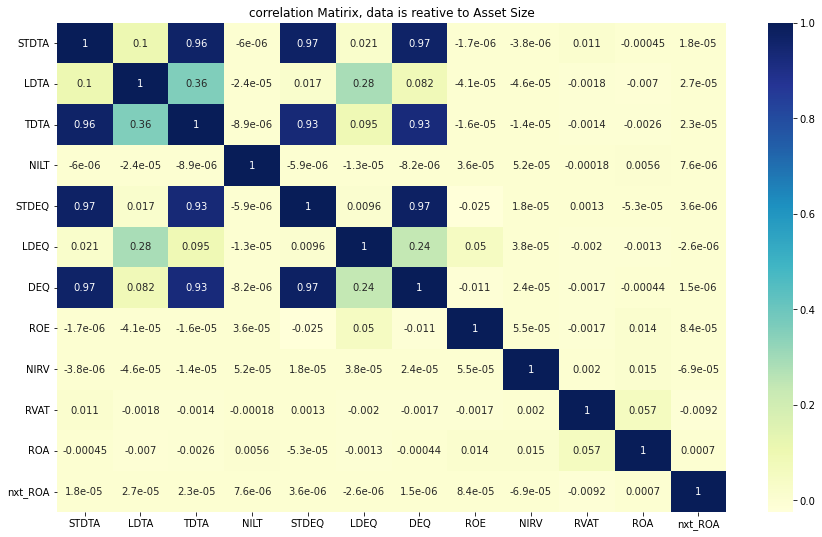

In [55]:
plt.figure(figsize = (15,9))
plt.yticks(rotation= 45) 
plt.title('correlation Matirix, data is reative to Asset Size')
g = sns.heatmap(df1.loc[:, colms].corr(), cmap="YlGnBu", annot=True,)
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')

## Removing Outlier

## Range :
    0 <= DEQ <= 10
    - 1 < ROE < 1
    0 <= TDTA < 5 
    -1 < NIRV < 1
    -1< NILT < 1
    0 <= RVAT < 10
    

In [56]:
df_range = df1[(0 <= df1['DEQ'])& (df1['DEQ'] <= 10)  & (-1 < df1['ROE']) & (df1['ROE'] < 1) & (0 <= df1['TDTA']) & (df1['TDTA'] < 5) &
              (-1 < df1['NIRV']) & (df1['NIRV'] < 1) & (-1 < df1['NILT']) & (df1['NILT'] < 1) & 
              (0 <= df1['RVAT']) & (df1['RVAT'] < 10) & (-1 < df1['nxt_ROA']) & (df1['nxt_ROA'] < 1)]

In [57]:
df_range.describe()

fyear            sic          STDTA           LDTA  \
count  320184.000000  319933.000000  320184.000000  320184.000000   
mean     2008.139095    4392.959904       0.112485       0.117745   
std         3.990959    1976.083459       0.127470       0.148363   
min      2001.000000     100.000000      -0.128429      -0.026255   
25%      2005.000000    2860.000000       0.014773       0.002699   
50%      2008.000000    3711.000000       0.073150       0.065052   
75%      2012.000000    6020.000000       0.170877       0.182779   
max      2016.000000    9998.000000       4.572801       4.601748   

                TDTA           NILT          STDEQ           LDEQ  \
count  320184.000000  320184.000000  320184.000000  320184.000000   
mean        0.230231       0.087769       0.395426       0.437346   
std         0.199263       0.211195       0.671432       0.802298   
min         0.000000      -0.999302      -0.294977      -0.087420   
25%         0.065306       0.004378       0.029402       0.005241   
50%         0.203435       0.047511       0.167367       0.152129   
75%         0.352460       0.144516       0.475624       0.509819   
max         4.806653       0.999856       9.961738       9.863097   

                 DEQ            ROE           NIRV           RVAT  \
count  320184.000000  320184.000000  320184.000000  320184.000000   
mean        0.832772       0.062498       0.050341       0.907157   
std         1.186779       0.176391       0.163416       0.759824   
min         0.000000      -0.999981      -0.999921       0.000028   
25%         0.121704       0.006535       0.003525       0.394782   
50%         0.450231       0.058554       0.034384       0.772801   
75%         1.035112       0.133813       0.094783       1.204641   
max         9.990149       0.999653       0.999270       9.978978   

                 ROA        nxt_ROA  
count  320184.000000  320184.000000  
mean        0.029899       0.022926  
std         0.069987       0.098466  
min        -0.945946      -0.999444  
25%         0.002569       0.001592  
50%         0.023439       0.022508  
75%         0.059765       0.058923  
max         0.920821       0.993430

In [58]:
colms

['STDTA',
 'LDTA',
 'TDTA',
 'NILT',
 'STDEQ',
 'LDEQ',
 'DEQ',
 'ROE',
 'NIRV',
 'RVAT',
 'ROA',
 'nxt_ROA']

In [59]:
df_range[['STDTA',
 'LDTA',
 'TDTA',
 'NILT',
 'STDEQ',
 'LDEQ',
 'DEQ',
 'ROE',
 'NIRV',
 'RVAT',
 'ROA','nxt_ROA']].describe()

STDTA           LDTA           TDTA           NILT  \
count  320184.000000  320184.000000  320184.000000  320184.000000   
mean        0.112485       0.117745       0.230231       0.087769   
std         0.127470       0.148363       0.199263       0.211195   
min        -0.128429      -0.026255       0.000000      -0.999302   
25%         0.014773       0.002699       0.065306       0.004378   
50%         0.073150       0.065052       0.203435       0.047511   
75%         0.170877       0.182779       0.352460       0.144516   
max         4.572801       4.601748       4.806653       0.999856   

               STDEQ           LDEQ            DEQ            ROE  \
count  320184.000000  320184.000000  320184.000000  320184.000000   
mean        0.395426       0.437346       0.832772       0.062498   
std         0.671432       0.802298       1.186779       0.176391   
min        -0.294977      -0.087420       0.000000      -0.999981   
25%         0.029402       0.005241       0.121704       0.006535   
50%         0.167367       0.152129       0.450231       0.058554   
75%         0.475624       0.509819       1.035112       0.133813   
max         9.961738       9.863097       9.990149       0.999653   

                NIRV           RVAT            ROA        nxt_ROA  
count  320184.000000  320184.000000  320184.000000  320184.000000  
mean        0.050341       0.907157       0.029899       0.022926  
std         0.163416       0.759824       0.069987       0.098466  
min        -0.999921       0.000028      -0.945946      -0.999444  
25%         0.003525       0.394782       0.002569       0.001592  
50%         0.034384       0.772801       0.023439       0.022508  
75%         0.094783       1.204641       0.059765       0.058923  
max         0.999270       9.978978       0.920821       0.993430

In [60]:
df_range.dropna(inplace = True)
df_range.reset_index(drop= True,inplace = True)

[Text(0, 0.5, 'STDTA'),
 Text(0, 1.5, 'LDTA'),
 Text(0, 2.5, 'TDTA'),
 Text(0, 3.5, 'NILT'),
 Text(0, 4.5, 'STDEQ'),
 Text(0, 5.5, 'LDEQ'),
 Text(0, 6.5, 'DEQ'),
 Text(0, 7.5, 'ROE'),
 Text(0, 8.5, 'NIRV'),
 Text(0, 9.5, 'RVAT'),
 Text(0, 10.5, 'ROA'),
 Text(0, 11.5, 'nxt_ROA')]

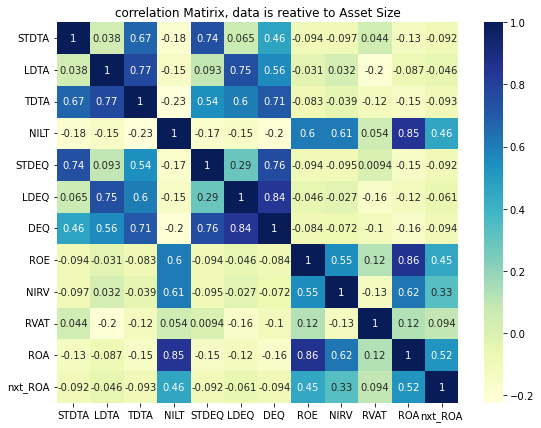

In [61]:
plt.figure(figsize = (9,7))
plt.yticks(rotation= 45) 
plt.title('correlation Matirix, data is reative to Asset Size')
g = sns.heatmap(df_range.loc[:, colms].corr(), cmap="YlGnBu", annot=True,)
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')

8428 No of firms are Non profitable
29054 No of firms are Profitable
Total no of firm  37482


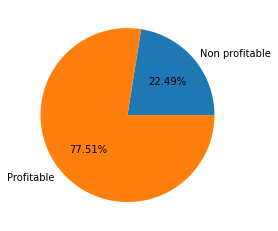

In [62]:
## firm's performance composition
l = [len(df_range.groupby('conml')['ROA'].mean()[df_range.groupby('conml')['ROA'].mean() <= 0]),len(df_range.groupby('conml')['ROA'].mean()[df_range.groupby('conml')['ROA'].mean() >0])]
tag = ['Non profitable', 'Profitable']
plt.pie(l, labels = tag,autopct='%1.2f%%')
for i, j in zip(l,tag) :
    print(i, 'No of firms are',j)
print('Total no of firm ', sum(l))

## Distribution plot

In [63]:
colms = ['STDTA','LDTA', 'TDTA', 'NILT', 'STDEQ', 'LDEQ', 'DEQ', 'ROE', 'NIRV', 'RVAT', 'ROA', 'nxt_ROA']

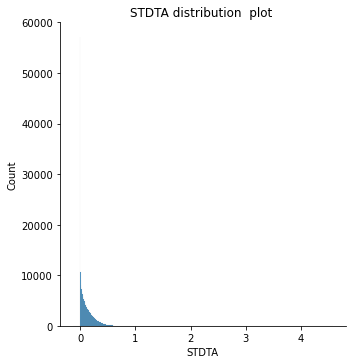

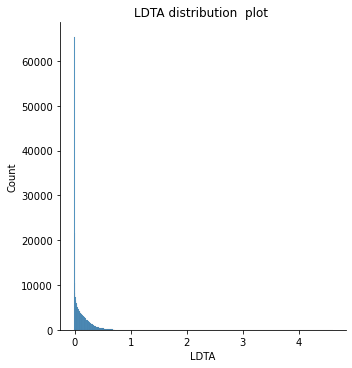

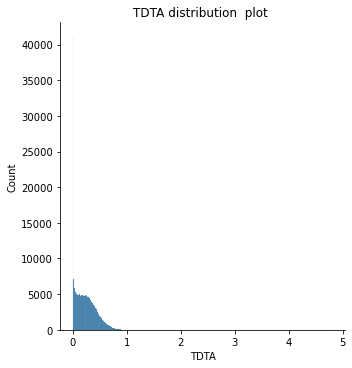

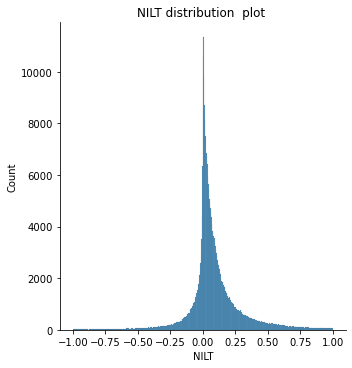

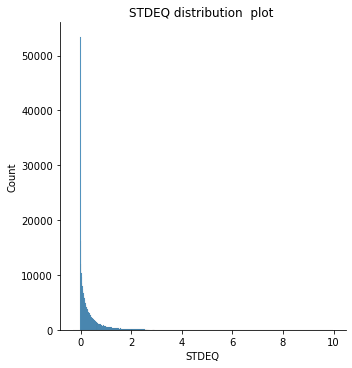

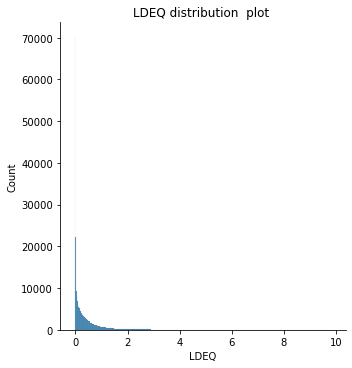

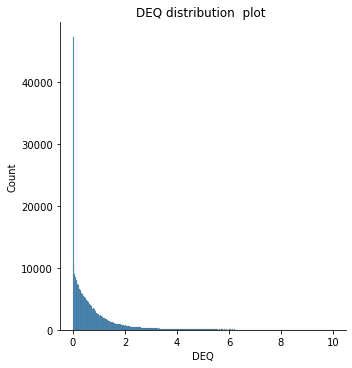

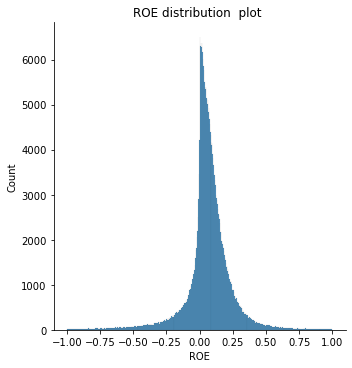

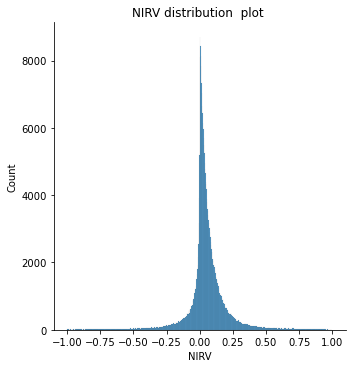

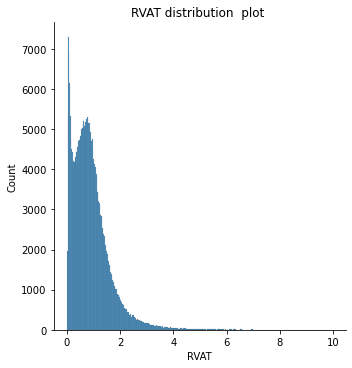

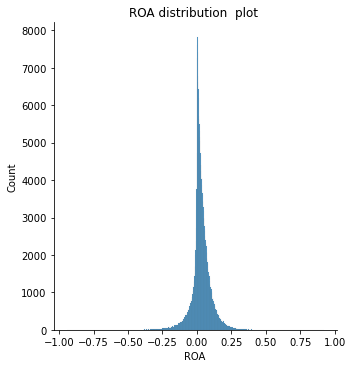

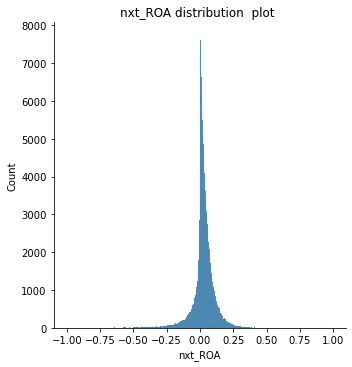

In [64]:
for i in  colms :
    sns.displot(df_range[i])
    plt.title( i + ' distribution  plot ')

## Models 
    OLS
    Decision Trees
    SVM
    Naïve Bayes

In [65]:
df_range['nxt_ROA']

0        -0.052470
1        -0.052816
2         0.015775
3        -0.041191
4         0.058369
            ...   
319928    0.115591
319929    0.083192
319930    0.083147
319931    0.096310
319932    0.088402
Name: nxt_ROA, Length: 319933, dtype: float64

In [66]:
colm = ['fyear','sic', 'STDTA', 'LDTA', 'TDTA', 'NILT', 'STDEQ','LDEQ', 'DEQ', 'ROE', 'NIRV', 'RVAT', 'ROA']
df_range_scaled = df_range[['nxt_ROA']] 
data = df_range[colm].values  

min_max_scaler = preprocessing.StandardScaler()
data_scaled = min_max_scaler.fit_transform(data)
df_range_scaled[colm]= data_scaled

### Distribution of Variables after standarization of Data

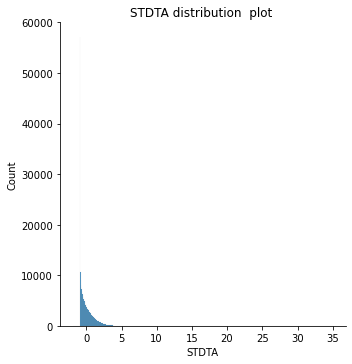

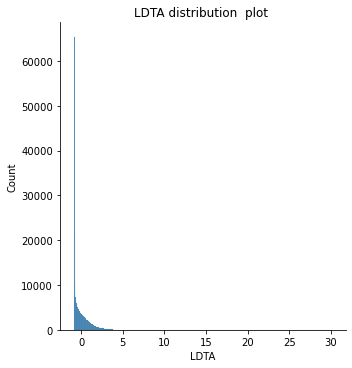

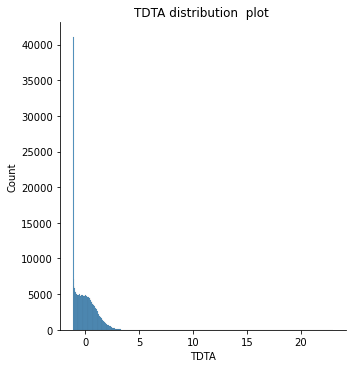

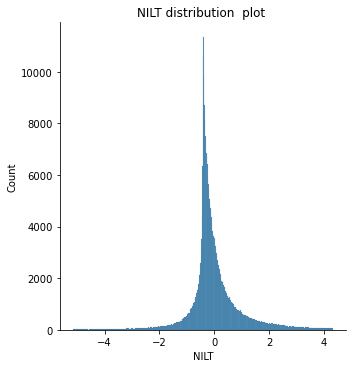

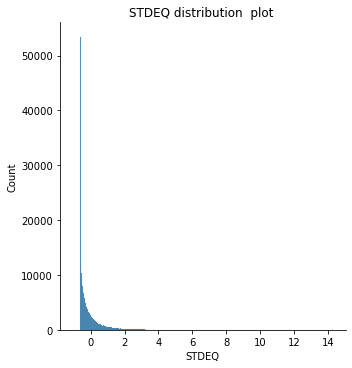

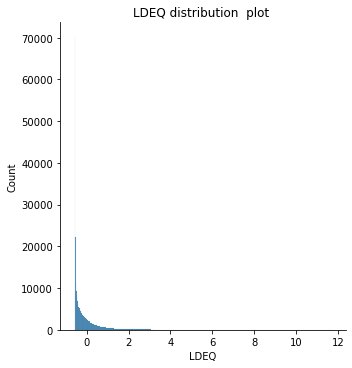

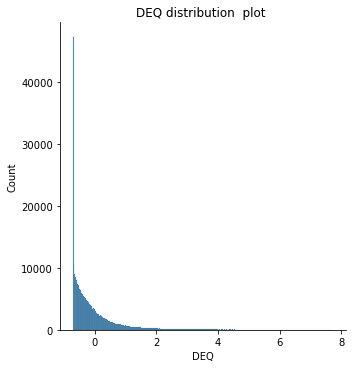

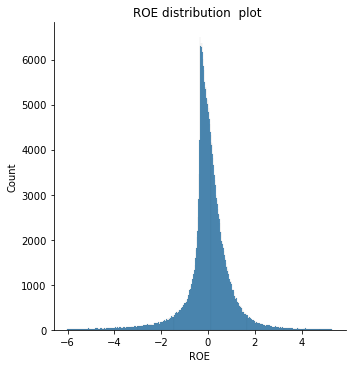

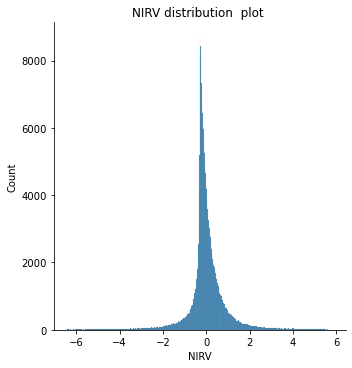

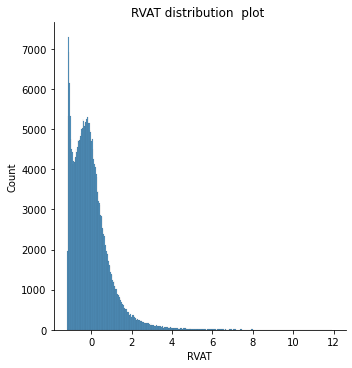

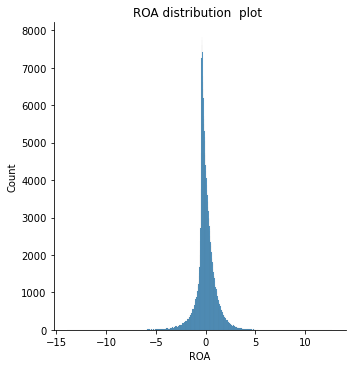

In [67]:
colms = [ 'STDTA', 'LDTA', 'TDTA', 'NILT', 'STDEQ','LDEQ', 'DEQ', 'ROE', 'NIRV', 'RVAT', 'ROA']
for i in  colms :
    sns.displot(df_range_scaled[i])
    plt.title( i + ' distribution  plot ')

### OLS

In [68]:
df_range_scaled.dropna(inplace = True)

### OLS

In [69]:
cols = ['fyear','sic', 'STDTA', 'LDTA', 'TDTA', 'NILT', 'STDEQ','LDEQ', 'DEQ', 'ROE', 'NIRV', 'RVAT', 'ROA']
x = df_range_scaled[cols]
y =df_range_scaled['nxt_ROA']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 ) 

result = sm.OLS(y_train, X_train).fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                nxt_ROA   R-squared (uncentered):                   0.263
Model:                            OLS   Adj. R-squared (uncentered):              0.263
Method:                 Least Squares   F-statistic:                              7250.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):                        0.00
Time:                        23:09:21   Log-Likelihood:                      2.2998e+05
No. Observations:              223953   AIC:                                 -4.599e+05
Df Residuals:                  223942   BIC:                                 -4.598e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [70]:
print('R2 for Train data',result.rsquared)
## root mean square of error
print('RMSE for Train data',np.sqrt(metrics.mean_squared_error(y_train, result.predict(X_train)))) 
print('RMSE for Test data', np.sqrt(metrics.mean_squared_error(y_test, result.predict(X_test)))) 

R2 for Train data 0.26261404952223666
RMSE for Train data 0.08665344910017342
RMSE for Test data 0.08688428779762684


## Residual Distribution

Text(0.5, 1.0, 'Residual Distribution of test Datasets')

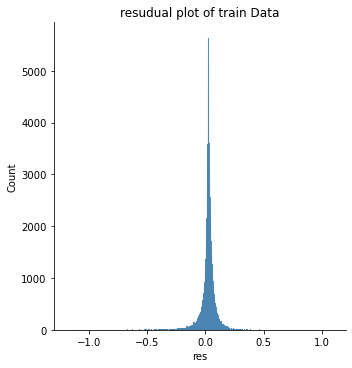

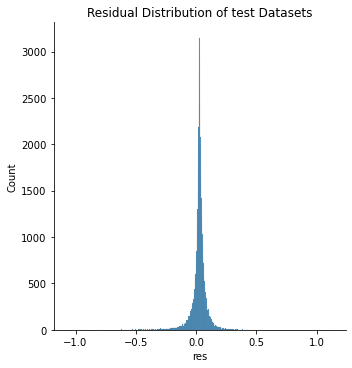

In [71]:
y_train_pred = result.predict(X_train)
y_test_pred = result.predict(X_test)
df = pd.DataFrame({'nxt_ROA_train':y_train,'Pred_nxt_ROA_train': y_train_pred })
df1 = pd.DataFrame({'nxt_ROA_test':y_test,'Pred_nxt_ROA_test':y_test_pred})
df['res'] = df['nxt_ROA_train'] - df['Pred_nxt_ROA_train']
df1['res'] = df1['nxt_ROA_test'] - df1['Pred_nxt_ROA_test']
sns.displot(df.res)
plt.title('resudual plot of train Data')

sns.displot(df1.res)
plt.title('Residual Distribution of test Datasets')

## Removing one ratio which have correlation ratio more than or equal to .75 (Multicoliniarity)


In [72]:
cols =  ['fyear','sic', 'STDTA', 'TDTA', 'DEQ','NIRV', 'RVAT', 'ROA']
x = df_range_scaled[cols]
y =df_range_scaled['nxt_ROA']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 ) 

result1 = sm.OLS(y_train, X_train).fit()

print(result1.summary())

                                 OLS Regression Results                                
Dep. Variable:                nxt_ROA   R-squared (uncentered):                   0.262
Model:                            OLS   Adj. R-squared (uncentered):              0.262
Method:                 Least Squares   F-statistic:                              9933.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):                        0.00
Time:                        23:09:26   Log-Likelihood:                      2.2990e+05
No. Observations:              223953   AIC:                                 -4.598e+05
Df Residuals:                  223945   BIC:                                 -4.597e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [73]:
print('R2 for Train data',result1.rsquared)
## root mean square of error
print('RMSE for Train data',np.sqrt(metrics.mean_squared_error(y_train, result1.predict(X_train)))) 
print('RMSE for Test data', np.sqrt(metrics.mean_squared_error(y_test, result1.predict(X_test)))) 
print('standard deviation for Test data', y_test.std()) 
print('standard deviation for Train data', y_train.std()) 

R2 for Train data 0.2618959763666304
RMSE for Train data 0.0866849263091731
RMSE for Test data 0.08695304006766164
standard deviation for Test data 0.09880382355156747
standard deviation for Train data 0.0982677610730536


[Text(0, 0.5, 'fyear'),
 Text(0, 1.5, 'sic'),
 Text(0, 2.5, 'STDTA'),
 Text(0, 3.5, 'TDTA'),
 Text(0, 4.5, 'DEQ'),
 Text(0, 5.5, 'NIRV'),
 Text(0, 6.5, 'RVAT'),
 Text(0, 7.5, 'ROA')]

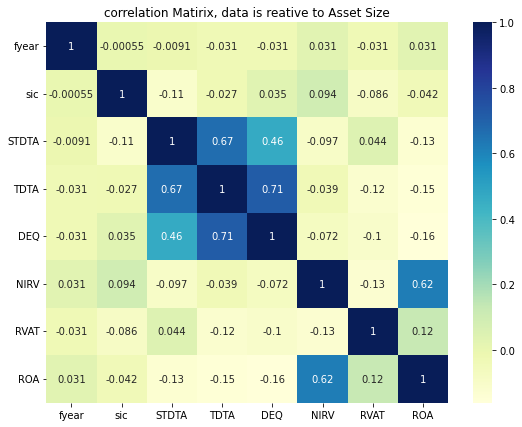

In [74]:
plt.figure(figsize = (9,7))
plt.yticks(rotation= 45) 
plt.title('correlation Matirix, data is reative to Asset Size')
g = sns.heatmap(df_range_scaled[cols].corr(), cmap="YlGnBu", annot=True,)
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')

## Excluding Banking sectors

In [75]:
exclud = list(range(6000,6163))
df_range1 = df_range[df_range['sic'].isin(exclud) == False]


In [76]:
colm = ['fyear','sic', 'STDTA', 'LDTA', 'TDTA', 'NILT', 'STDEQ','LDEQ', 'DEQ', 'ROE', 'NIRV', 'RVAT', 'ROA']
df_range_scaled1 = df_range1[['nxt_ROA']] 
data1 = df_range1[colm].values  

min_max_scaler1 = preprocessing.StandardScaler()
data_scaled1 = min_max_scaler.fit_transform(data1)
df_range_scaled1[colm]= data_scaled1

In [77]:
cols =  ['fyear','sic', 'STDTA', 'TDTA', 'STDEQ', 'DEQ','NIRV', 'RVAT', 'ROA']
x1 = df_range_scaled1[cols]
y1 =df_range_scaled1['nxt_ROA']

X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.30 ) 

result1 = sm.OLS(y_train1, X_train1).fit()

print(result1.summary())

                                 OLS Regression Results                                
Dep. Variable:                nxt_ROA   R-squared (uncentered):                   0.266
Model:                            OLS   Adj. R-squared (uncentered):              0.266
Method:                 Least Squares   F-statistic:                              8605.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):                        0.00
Time:                        23:09:27   Log-Likelihood:                      2.1638e+05
No. Observations:              213978   AIC:                                 -4.327e+05
Df Residuals:                  213969   BIC:                                 -4.326e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [80]:
print('R2 for Train data',result1.rsquared)
## root mean square of error
print('RMSE for Train data',np.sqrt(metrics.mean_squared_error(y_train1, result1.predict(X_train1)))) 
print('RMSE for Test data', np.sqrt(metrics.mean_squared_error(y_test1, result1.predict(X_test1)))) 

R2 for Train data 0.26576292184136474
RMSE for Train data 0.08802413450022288
RMSE for Test data 0.08926594123781081


In [81]:
y_test.mean(), y_test.std()

(0.023076893481351706, 0.09880382355156747)

## Decision Tree

In [82]:
from sklearn.tree  import DecisionTreeRegressor 
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV

In [83]:
cols = ['fyear','sic', 'STDTA', 'LDTA', 'TDTA', 'NILT', 'STDEQ','LDEQ', 'DEQ', 'ROE', 'NIRV', 'RVAT', 'ROA']
x = df_range_scaled[cols]
y = df_range_scaled['nxt_ROA']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30 ) 

## Hyper parameters range intialization for tuning


In [84]:
parameters={ 
            "splitter":["best"],
            "max_depth" : [4,5,6],
           "min_samples_leaf":[100,500,1000,2000,3000,5000,7000],
           "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto"],
            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]
              }
reg_decision_model=DecisionTreeRegressor()
tuning_model= RandomizedSearchCV(reg_decision_model,param_distributions=parameters, scoring='neg_mean_squared_error',cv=3,verbose=3)
tuning_model.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=100, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=100, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=5, max_features=auto, max_leaf_nodes=40, min_samples_leaf=100, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END max_depth=4, max_features=auto, max_leaf_nodes=10, min_samples_leaf=100, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END max_depth=4, max_features=auto, max_leaf_nodes=10, min_samples_leaf=100, min_weight_fraction_leaf=0.9, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END max_depth=4, max_features=auto, max_leaf_nodes=10, min_samples_leaf=100, min_weight_fraction_leaf=0.9, splitter=best;, sc

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [4, 5, 6],
                                        'max_features': ['auto'],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_samples_leaf': [100, 500, 1000,
                                                             2000, 3000, 5000,
                                                             7000],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2, 0.3,
                                                                     0.4, 0.5,
                                                                     0.6, 0.7,
                                                                     0.8, 0.9],
                             

In [85]:
tuned_model = tuning_model.best_estimator_
tuning_model.best_params_

{'splitter': 'best',
 'min_weight_fraction_leaf': 0.0,
 'min_samples_leaf': 100,
 'max_leaf_nodes': 70,
 'max_features': 'auto',
 'max_depth': 6}

In [86]:
tuning_model.best_score_  ## negative of Mean square Error values

-0.007012339821336741

In [87]:
print('R2: ',metrics.r2_score(y_pred = tuning_model.predict(X_train), y_true = y_train))

R2:  0.28785064026259477


## Performance Matrics

In [88]:

## root mean square of error
print('RMSE for Test data', np.sqrt(metrics.mean_squared_error(y_test,tuned_model.predict(X_test)))) 
print('RMSE for Train data', np.sqrt(metrics.mean_squared_error(y_train,tuned_model.predict(X_train)))) 

RMSE for Test data 0.08275534417000682
RMSE for Train data 0.08326401359040622


In [89]:
## Flow Chart of Decisin Tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize=(25,20), dpi=1000)
tree.plot_tree(tuned_model,feature_names = cols,class_names='nxt_ROA',filled = True)
fig.savefig('Decision_tree.png')

Feature: 0, Score: 0.00717
Feature: 1, Score: 0.00244
Feature: 2, Score: 0.00151
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00098
Feature: 5, Score: 0.01038
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00139
Feature: 8, Score: 0.00133
Feature: 9, Score: 0.00159
Feature: 10, Score: 0.00518
Feature: 11, Score: 0.00502
Feature: 12, Score: 0.96300


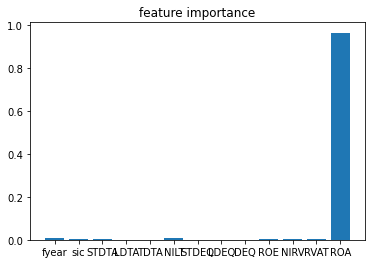

In [90]:
importance = tuned_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar(cols, importance)
plt.title('feature importance')
fig.savefig('features_imp.png')

## Residual Distribution

Text(0.5, 1.0, 'Residual Distribution of test Datasets in Decision Tree')

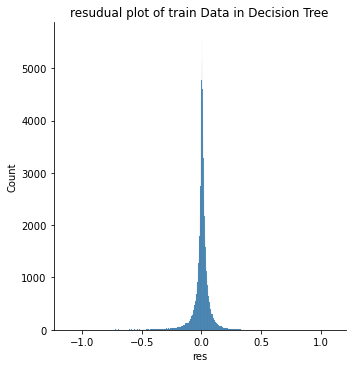

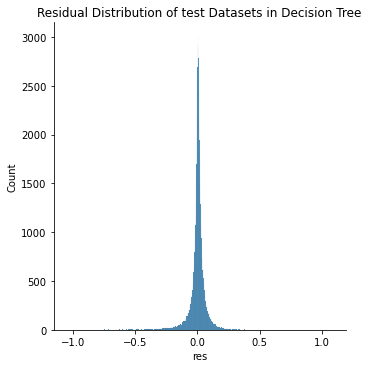

In [91]:
y_train_pred = tuned_model.predict(X_train)
y_test_pred = tuned_model.predict(X_test)
df = pd.DataFrame({'nxt_ROA_train':y_train,'Pred_nxt_ROA_train': y_train_pred })
df1 = pd.DataFrame({'nxt_ROA_test':y_test,'Pred_nxt_ROA_test':y_test_pred})
df['res'] = df['nxt_ROA_train'] - df['Pred_nxt_ROA_train']
df1['res'] = df1['nxt_ROA_test'] - df1['Pred_nxt_ROA_test']
sns.displot(df.res)
plt.title('resudual plot of train Data in Decision Tree')

sns.displot(df1.res)
plt.title('Residual Distribution of test Datasets in Decision Tree')

## SVM

In [92]:
# Fit the model over the training data
#from sklearn.svm import SVR
#reg_svm = SVR()

In [93]:
#parameters= {"kernel" : ['rbf',"linear"], "gamma" : ['scale','auto'], "C" : [1.0, 10,100,1000,10000], "epsilon" : [0.1, 0.01,0.002,0.02] }
#tuning_model= RandomizedSearchCV(reg_svm,param_distributions=parameters, scoring='neg_mean_squared_error', cv=2,cache_sizefloat= 500)

#tuning_model.fit(X_train,y_train)

## Laso  linear regrssion 

In [94]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)


In [95]:
parameters= {"alpha" : [ 0.3,1, 10,100],"fit_intercept": [True, False]}
tuning_model= RandomizedSearchCV(clf,param_distributions=parameters, scoring='neg_mean_squared_error', cv=2)

tuning_model.fit(X_train,y_train)

RandomizedSearchCV(cv=2, estimator=Lasso(alpha=0.1),
                   param_distributions={'alpha': [0.3, 1, 10, 100],
                                        'fit_intercept': [True, False]},
                   scoring='neg_mean_squared_error')

In [96]:
tuning_model.best_params_

{'fit_intercept': True, 'alpha': 0.3}

In [97]:
tuned_model = tuning_model.best_estimator_
tuning_model.best_params_

{'fit_intercept': True, 'alpha': 0.3}

In [98]:
print('R2: ',metrics.r2_score(y_pred = tuning_model.predict(X_train), y_true = y_train))
## root mean square of error
print('RMSE for Test data', np.sqrt(metrics.mean_squared_error(y_test,tuned_model.predict(X_test)))) 
print('RMSE for Train data', np.sqrt(metrics.mean_squared_error(y_train,tuned_model.predict(X_train)))) 

R2:  0.0
RMSE for Test data 0.09787019413511237
RMSE for Train data 0.09866697132845502


##  Ridge linear regrssion

In [99]:
from sklearn import linear_model
clf = linear_model.Ridge()

In [100]:
parameters= {"alpha" : [ 0.3,1, 10,100],"fit_intercept": [True, False]}
tuning_model= RandomizedSearchCV(clf,param_distributions=parameters, scoring='neg_mean_squared_error', cv=2)

tuning_model.fit(X_train,y_train)

RandomizedSearchCV(cv=2, estimator=Ridge(),
                   param_distributions={'alpha': [0.3, 1, 10, 100],
                                        'fit_intercept': [True, False]},
                   scoring='neg_mean_squared_error')

In [101]:
tuned_model = tuning_model.best_estimator_
tuning_model.best_params_

{'fit_intercept': True, 'alpha': 10}

In [102]:
print('R2: ',metrics.r2_score(y_pred = tuning_model.predict(X_train), y_true = y_train))
## root mean square of error
print('RMSE for Test data', np.sqrt(metrics.mean_squared_error(y_test,tuned_model.predict(X_test)))) 
print('RMSE for Train data', np.sqrt(metrics.mean_squared_error(y_train,tuned_model.predict(X_train)))) 

R2:  0.2773475729382182
RMSE for Test data 0.08305751317480556
RMSE for Train data 0.08387577193706325
